First, import the required libraries

In [201]:
import pandas as pd
import numpy as np
from sklearn import tree

In [202]:
df=pd.read_csv("student_dataset.csv")

In [203]:
df

,Grades,Attendance,Study Hours,Label
0,46,0.62,2,Weak
1,59,0.71,3,Weak
2,54,0.67,3,Weak
3,50,0.62,3,Weak
4,47,0.60,4,Weak
...,...,...,...,...
295,64,0.78,4,Average
296,76,0.80,5,Average
297,75,0.84,6,Average
298,74,0.75,3,Average


In [204]:
#assign data and column
X=df.drop('Label',axis=1)
y=df['Label']

In [205]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size = 0.2,random_state = 42)

In [45]:
X_test,Y_test

(     Grades  Attendance  Study Hours
 203      63        0.86            7
 266      64        0.89            6
 152      97        0.90            6
 9        43        0.62            1
 233      79        0.75            3
 226      77        0.89            7
 196      98        0.92            9
 109      81        0.86            9
 5        46        0.62            4
 175      84        0.86            9
 237      73        0.78            6
 57       51        0.74            4
 218      69        0.77            4
 45       42        0.72            1
 182      83        0.89            9
 221      65        0.88            7
 289      61        0.71            3
 211      73        0.87            6
 148      95        0.82            6
 165      94        0.81            8
 78       40        0.61            2
 113      84        0.95            5
 249      60        0.75            5
 250      60        0.86            4
 104      85        0.95            7
 42       51

In [222]:
#train classifier
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=5, min_samples_split=15,min_samples_leaf=5,splitter='best', max_features='sqrt',ccp_alpha=0.1) # defining decision tree classifier
clf=clf.fit(X_train,Y_train) # train data on new data and new target
prediction = clf.predict(X_test) #  assign removed data as input


In [224]:
prediction

array(['Average', 'Average', 'Advanced', 'Weak', 'Weak', 'Average',
       'Advanced', 'Advanced', 'Weak', 'Advanced', 'Average', 'Weak',
       'Weak', 'Weak', 'Advanced', 'Average', 'Weak', 'Average',
       'Advanced', 'Advanced', 'Weak', 'Advanced', 'Average', 'Weak',
       'Advanced', 'Weak', 'Average', 'Weak', 'Advanced', 'Weak', 'Weak',
       'Advanced', 'Weak', 'Weak', 'Weak', 'Advanced', 'Weak', 'Weak',
       'Weak', 'Weak', 'Weak', 'Weak', 'Average', 'Weak', 'Weak', 'Weak',
       'Average', 'Weak', 'Advanced', 'Average', 'Advanced', 'Advanced',
       'Average', 'Weak', 'Average', 'Weak', 'Weak', 'Weak', 'Advanced',
       'Weak'], dtype=object)

In [225]:
from sklearn.metrics import accuracy_score


we check if our predicted labels match the original labels

In [226]:
#print("Original Labels",X_test)
#print("Labels Predicted",prediction)

print("Train data accuracy:",accuracy_score(y_true =Y_train, y_pred=clf.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = Y_test, y_pred=prediction))

Train data accuracy: 0.8541666666666666
Test data accuracy: 0.85


In [227]:
from sklearn import metrics
cf=metrics.confusion_matrix(Y_test,prediction)
cf

array([[16,  0,  0],
       [ 0, 13,  9],
       [ 0,  0, 22]], dtype=int64)

In [228]:
print("Precision",metrics.precision_score(Y_test,prediction,average=None))

Precision [1.         1.         0.70967742]


In [229]:
print("Recall",metrics.recall_score(Y_test,prediction,average=None))

Recall [1.         0.59090909 1.        ]


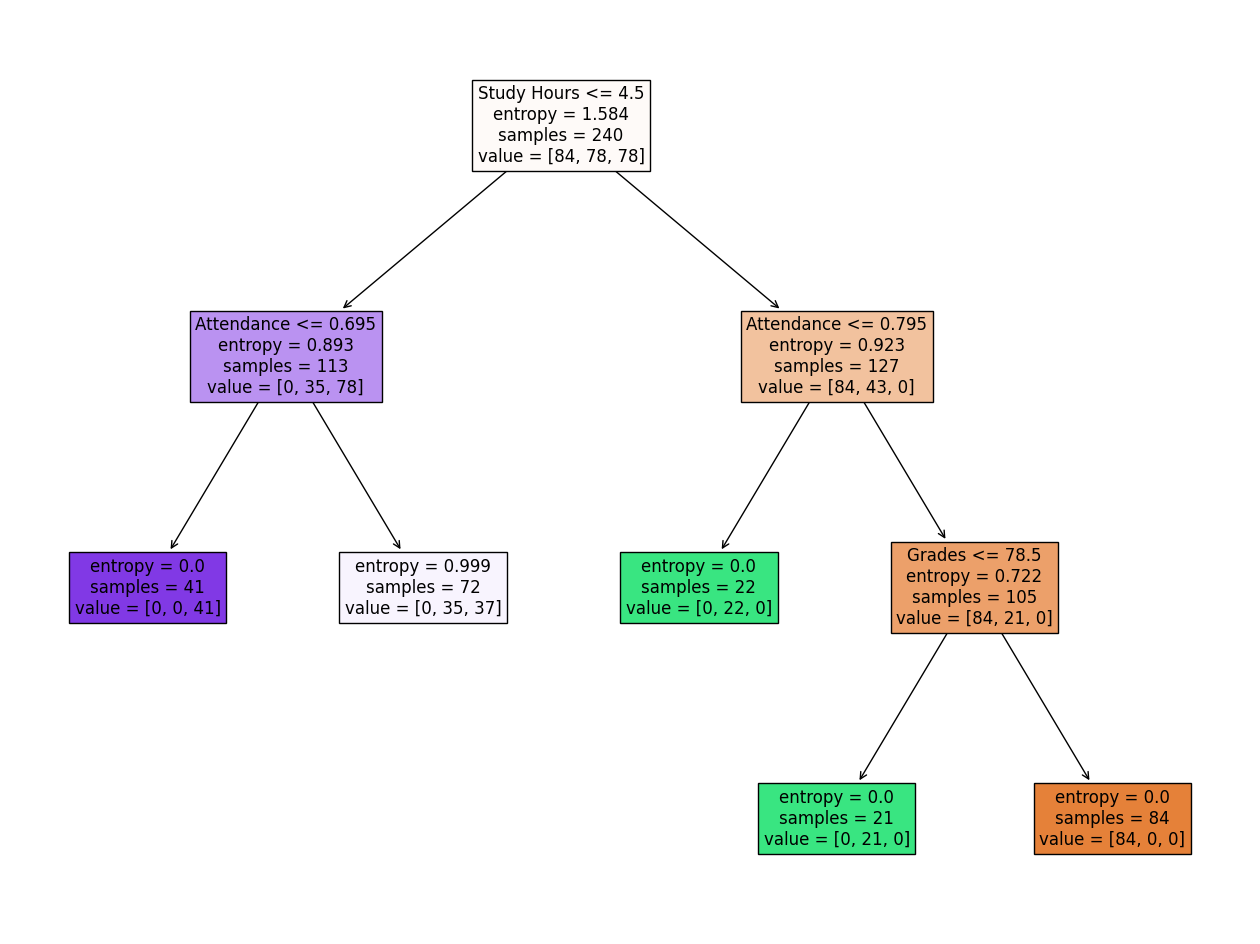

In [230]:
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,12))
a = plot_tree(clf, feature_names=X.columns, fontsize=12, filled=True)

In [231]:
feature_importances = clf.feature_importances_

# Now, feature_importances contains the importance of each feature
# You can print or analyze this array to understand which features contribute most to the decision making
print("Feature importances:")
for i, importance in enumerate(feature_importances):
    print(f"Feature {i}: {importance}")

Feature importances:
Feature 0: 0.24593904377025555
Feature 1: 0.22844494438749444
Feature 2: 0.5256160118422499
